# Visual Analytics

## Assignment 1

**Instructor:** Dr. Marco D'Ambros  
**TAs:** Carmen Armenti, Mattia Giannaccari

**Contacts:** marco.dambros@usi.ch, carmen.armenti@usi.ch, mattia.giannaccari@usi.ch

**Due Date:** 10 April, 2025 @ 23:55

---

### Goal

The goal of this assignment is to use Python and Jupyter notebook to explore, analyze and visualize the datasets provided. 

The assignment is divided into four sections, each requiring you to apply the knowledge gained from both the theoretical and practical lectures to solve the exercises. Specifically, when creating tabular or graphical representations, you should apply the principles learned in the theoretical lectures and use the technologies introduced in the practical sessions. The datasets you need to use are detailed in the **Datasets Description** section and can be found in the following folder [Assignment1_Data](https://usi365-my.sharepoint.com/:f:/g/personal/armenc_usi_ch/EqjXB7uSEoVAujKPSZY1hvIBMhAXJv5y6Z-UwaO6bCtOjg?e=kxcaai).

### Submission Guidelines
- **Format:** Please submit a Jupyter Notebook containing your solutions along with a clear explanation of the **steps** taken to arrive at each solution. Each solution must be introduced by a Markdown cell indicating the exercise number. If you prefer, you may use the uploaded assignment file and develop your solution by adding cells below each exercise instructions. It is essential that every choice is justified, and the solution is thoroughly commented to explain each step. Exercises without explanations will be evaluated negatively.

- **Filename:** Please name the Jupyter notebook as follows: `SurenameName_Assignment1.ipynb`.

- **Submission:** Please submit your solution (the jupyter notebook and any other script you may have used to support your solution) to iCorsi.


---
## Section 1 - Data quality (10 points)

**Data Source:** `used_cars.csv`.

In the `used_cars.csv` dataset, please perform the following data cleaning steps: 
- Identify any missing or invalid values in the following columns: `vehicle type`, `price`, `brand`, and `month of registration`. If needed, standardize the data. For the `price` column specifically, the prices are recorded in euros, please consider valid only values within the range of €1,000 and €500,000. 
- For each of the previous columns, report the number of missing or invalid entries.
- After identifying missing or invalid values in the columns above, remove **any** rows where at least one of these columns contains such data.

Please clearly outline the steps you take to clean the dataset and document your approach. You may use any preferred tool or technology, such as Python (vanilla or Pandas) or OpenRefine.

### Libraries

In [2]:
import pandas as pd

----------

In [3]:
cars_dataset = pd.read_csv('./datasets/used_cars.csv', encoding='windows-1252')
cars_dataset.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
columns = cars_dataset[['vehicleType', 'price', 'brand', 'monthOfRegistration']]
nan_values = columns.isnull().sum()
print("Null values:")
print(nan_values)

Null values:
vehicleType            37869
price                      0
brand                      0
monthOfRegistration        0
dtype: int64


In [5]:
print(cars_dataset["brand"].value_counts())

brand
volkswagen        79640
bmw               40265
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
bmw                   6
BMW       

Come è possibile vedere, abbiamo un brand che si ripete a causa di differenze di formattazione (ad esempio lower e upper case e abbiamo la ripetizione di 2 bmw, probabilmente dato dal fatto che uno dei due valori contiene caratteri non visibili)

In [6]:
cars_dataset["brand"] = cars_dataset["brand"].apply(lambda x: x.strip()).str.lower()
cars_dataset["brand"].value_counts()

brand
volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: count, dtype: int64

In [7]:
# Controllo per vedere evnetuali valori invalidi
print(cars_dataset["monthOfRegistration"].value_counts())

monthOfRegistration
0     37675
3     36170
6     33167
4     30918
5     30631
7     28958
10    27337
11    25489
12    25380
9     25074
1     24561
8     23765
2     22403
Name: count, dtype: int64


In questo caso abbiamo un problema: il mese risulta essere 0, il che non ha senso. Nella successiva query oltre che a filtrare le righe in base al prezzo, elimino anche le righe che contengono valori non validi relativi al mese

In [8]:
invalid_price_rows = len(cars_dataset[['price']].query('price < 1000 or price > 500000'))
print('Number of invalid price rows:', invalid_price_rows)

Number of invalid price rows: 83435


Filter out all the invalid values from the dataset

In [9]:
cleaned_dataset = cars_dataset.dropna(subset=['vehicleType', 'price', 'brand', 'monthOfRegistration']).query('price >= 1000 and price <= 500000 and monthOfRegistration >= 1 and monthOfRegistration <= 12')
print('Number of rows in original dataset:', len(cars_dataset))
print('Number of rows in cleaned dataset:', len(cleaned_dataset))

cleaned_dataset.head()

Number of rows in original dataset: 371528
Number of rows in cleaned dataset: 255586


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39


----

## Section 2 - Data Analysis, Visualization, and Exploration (60 points) 📊
In this section, you will need to use two different datasets: `us_accidents.csv` for the first three exercises and `eu_energy.csv` for the next three. Each exercise is worth 10 points.

### Section 2.1 
**Data Source**: `us_accidents.csv`

1. In the US Accidents dataset please remove all rows where one or more columns have missing data and explicitly identify the number of rows with null values. Consider the years 2020 and 2022.

    - What are the cities with the highest number of accidents in 2020 and 2022? Report them with the number of accidents.
    - Please provide the yearly total number of car accidents in 2020 and 2022 for each `County` and `City` combination.
    - Please retrieve the 10 cities with the highest total number of accidents in 2020 and 2022, and create a visualization that:
    
        - As a **primary goal** shows the increase in accident numbers for each city that allows the comparison of the increase per city. Which is the city with the most significant increase?
        - As a **secondary goal** presents the absolute number of accidents in both 2020 and 2022 for each selected city.
    
    Please explain the insights gained from the visualization and justify the choice of the representation.


### Libraries

In [10]:
import pandas as pd
from bokeh.models import ColumnDataSource, HoverTool, NumeralTickFormatter
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool, NumeralTickFormatter, FixedTicker

output_notebook()

Loading BokehJS ...

----

In [11]:
us_accidents = pd.read_csv('./datasets/us_accidents.csv')

In [12]:
us_accidents.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [13]:
invalid_values = us_accidents.isnull().sum()
print("Invalid values per column:")
print(invalid_values)

Invalid values per column:
ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity         

In [14]:
total_null_rows = us_accidents.isnull().any(axis=1).sum()
print('Total number of rows with null values:', total_null_rows)

Total number of rows with null values: 4173845


In [15]:
cleaned_us_accidents = us_accidents.dropna()
print('Number of rows in original dataset:', len(us_accidents))
print('Number of rows in cleaned dataset:', len(cleaned_us_accidents))

Number of rows in original dataset: 7728394
Number of rows in cleaned dataset: 3554549


In [16]:
# Rimuovo i nanosecondi a causa di un errore di formattazione quando utilizzo la funzione pd.to_datetime
cleaned_us_accidents['Start_Time'] = cleaned_us_accidents['Start_Time'].str.split('.').str[0]
cleaned_us_accidents['End_Time'] = cleaned_us_accidents['End_Time'].str.split('.').str[0]
cleaned_us_accidents['Year'] = pd.to_datetime(cleaned_us_accidents['Start_Time']).dt.year
cleaned_us_accidents['Month'] = pd.to_datetime(cleaned_us_accidents['Start_Time']).dt.month


/var/folders/s1/sw35yzzd0jbfjch6km2zwyqm0000gn/T/ipykernel_40217/500214284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_us_accidents['Start_Time'] = cleaned_us_accidents['Start_Time'].str.split('.').str[0]
/var/folders/s1/sw35yzzd0jbfjch6km2zwyqm0000gn/T/ipykernel_40217/500214284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_us_accidents['End_Time'] = cleaned_us_accidents['End_Time'].str.split('.').str[0]
/var/folders/s1/sw35yzzd0jbfjch6km2zwyqm0000gn/T/ipykernel_40217/500214284

In [17]:
# check if start_time are on 2020 or 2022
us_accidents_2020_2022= cleaned_us_accidents[cleaned_us_accidents['Year'].isin([2020, 2022])]
us_accidents_2020_2022.reset_index(drop=True, inplace=True)
us_accidents_2020_2022.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month
0,A-3671785,Source1,2,2022-12-04 21:34:02,2023-02-28 00:00:43,45.822099,-119.885892,45.819242,-119.902381,0.818,...,False,False,False,False,Night,Night,Night,Night,2022,12
1,A-3705247,Source1,2,2022-05-18 22:10:00,2022-05-19 00:10:57,38.904107,-77.018215,38.905693,-77.013704,0.266,...,False,False,False,False,Night,Night,Night,Night,2022,5
2,A-3705249,Source1,2,2022-11-12 01:03:52,2022-11-12 02:29:16,46.483201,-114.126399,46.485270,-114.125932,0.145,...,False,False,False,False,Night,Night,Night,Night,2022,11
3,A-3705250,Source1,2,2022-09-03 09:40:03,2022-09-03 11:16:03,29.725044,-95.298193,29.722916,-95.298129,0.147,...,True,False,False,False,Day,Day,Day,Day,2022,9
4,A-3705251,Source1,2,2022-02-11 17:33:06,2022-02-11 19:40:56,30.698144,-86.571374,30.700222,-86.572708,0.164,...,False,False,False,False,Night,Day,Day,Day,2022,2


In [18]:
#standardize the row values of the column 'City'
us_accidents_2020_2022['City'] = us_accidents_2020_2022['City'].apply(lambda x: x.strip()).str.capitalize()
accidents_by_city = us_accidents_2020_2022['City'].value_counts()
accidents_by_city

/var/folders/s1/sw35yzzd0jbfjch6km2zwyqm0000gn/T/ipykernel_40217/3132623813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_accidents_2020_2022['City'] = us_accidents_2020_2022['City'].apply(lambda x: x.strip()).str.capitalize()


City
Miami          82305
Los angeles    43672
Orlando        42730
Dallas         26548
Houston        26341
               ...  
Toutle             1
Carrizozo          1
Industry           1
Lobelville         1
Potlatch           1
Name: count, Length: 9357, dtype: int64

In [ ]:

top_cities = accidents_by_city.head(10).sort_values()
data = pd.DataFrame({
    'City': top_cities.index,
    'Accidents': top_cities.values
})

source = ColumnDataSource(data)

p = figure(
    y_range=data['City'],
    height=500,
    width=700,
    title="Top 10 Cities with Most Accidents",
    toolbar_location=None,
    tools="",
    x_axis_label='Number of Accidents',
    y_axis_label='City'
)

p.hbar(
    y='City',
    right='Accidents',
    height=0.6,
    source=source,
    line_color='white'
)

p.ygrid.grid_line_color = None
p.xaxis.minor_tick_line_color = None
p.xaxis[0].formatter = NumeralTickFormatter(format="0,0")
p.x_range.start = 0

show(p)

In [20]:
city_couty_accidents = pd.DataFrame(us_accidents_2020_2022.groupby(['City', 'County', 'Year']).size().unstack(fill_value=0)).reset_index()
city_couty_accidents.columns.name = None
city_couty_accidents

,City,County,2020,2022
0,Aaronsburg,Centre,0,7
1,Abbeville,Abbeville,33,99
2,Abbeville,McCormick,1,1
3,Abbotsford,Marathon,0,3
4,Abbottstown,Adams,2,26
...,...,...,...,...
15537,Zumbrota,Goodhue,94,160
15538,Zuni,Isle of Wight,6,34
15539,Zuni,Southampton,0,2
15540,Zwingle,Dubuque,0,1


In [21]:
# Calculate metrics
city_couty_accidents['Total'] = city_couty_accidents[[2020, 2022]].sum(axis=1)
top_cities = city_couty_accidents.sort_values(by='Total', ascending=False).head(10)
# top_cities['% Increase'] = ((top_cities[2022] - top_cities[2020]) / top_cities[2020] * 100).round(1)
top_cities['Increase'] = top_cities[2022] - top_cities[2020]
top_cities.sort_values(by='Increase', inplace=True)
top_cities.reset_index(drop=True, inplace=True)
top_cities

,City,County,2020,2022,Total,Increase
0,Baton rouge,East Baton Rouge,5071,11510,16581,6439
1,San diego,San Diego,5544,12120,17664,6576
2,Nashville,Davidson,4854,12163,17017,7309
3,Charlotte,Mecklenburg,8936,16489,25425,7553
4,Raleigh,Wake,5881,13506,19387,7625
5,Los angeles,Los Angeles,17114,26558,43672,9444
6,Dallas,Dallas,7540,18414,25954,10874
7,Houston,Harris,6781,19403,26184,12622
8,Orlando,Orange,8415,34301,42716,25886
9,Miami,Miami-Dade,20983,61284,82267,40301


-----

In [22]:
data = {
    'City': top_cities['City'],
    'Increase': top_cities['Increase'],
    'Accidents_2020': top_cities[2020],
    'Accidents_2022': top_cities[2022],
}

source = ColumnDataSource(data)

p = figure(
    y_range=data['City'],
    height=650,
    width=900,
    title="Top 10 Cities with Most Increase in Accidents (2020-2022)",
    toolbar_location=None,
    tools="",
    x_axis_label='Increase in Accidents between 2020 and 2022',
    y_axis_label='City'
)

hover = HoverTool()
hover.tooltips = [
    ("City", "@City"),
    ("2020 Accidents", "@Accidents_2020{0,0}"),
    ("2022 Accidents", "@Accidents_2022{0,0}"),
    ("Increase", "+@Increase{0,0}"),
]

p.add_tools(hover)

bars = p.hbar(
    y='City',
    right='Increase',
    height=0.6,
    source=source,
    line_color='white'
)

max_increase = max(data['Increase'])
p.xaxis.ticker = FixedTicker(ticks=list(range(0, int(max_increase), 5000)))

p.ygrid.grid_line_color = None
p.xaxis.minor_tick_line_color = None
p.xaxis[0].formatter = NumeralTickFormatter(format="0,0")
p.x_range.start = 0

show(p)

2. We define the **accident duration** as the time elapsed from the start of the accident until its impact on traffic flow is resolved.

    Please provide a table that shows the minimum and maximum accident duration for each combination of `State`, `County`, `City`, `Year`, `Month`, ensuring that only combinations with data for all 12 months is available. Then, filter the data to include only **Los Angeles**, **Dallas**, and **New York** cities and plot the behavior of the minimum and maximum durations for accidents that occurred in 2022. Choose a visualization that highlights how the average values of both minimum and maximum durations relate to the minimum-maximum range.

    - Which city shows the least pronounced variation? 
    - What insights can you draw from the plot?

    Please explain what the plot reveals and justify the choice of visualization.
    

In [23]:
us_accidents_2020_2022['Accident_Duration'] = (pd.to_datetime(us_accidents_2020_2022['End_Time']) - pd.to_datetime(us_accidents_2020_2022['Start_Time'])).dt.total_seconds().astype(int)

valid = us_accidents_2020_2022.groupby(
    ['State', 'County', 'City', 'Year']
)['Month'].nunique().reset_index()

valid = valid[valid['Month'] == 12]

filtered_accidents = pd.merge(
    us_accidents_2020_2022,
    valid[['State', 'County', 'City', 'Year']],
    on=['State', 'County', 'City', 'Year'],
    how='inner'
)

min_max_df = filtered_accidents.groupby(
    ['State', 'County', 'City', 'Year', 'Month']
)['Accident_Duration'].agg(['min', 'max']).reset_index()


print(min_max_df.head())

/var/folders/s1/sw35yzzd0jbfjch6km2zwyqm0000gn/T/ipykernel_40217/2732276703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_accidents_2020_2022['Accident_Duration'] = (pd.to_datetime(us_accidents_2020_2022['End_Time']) - pd.to_datetime(us_accidents_2020_2022['Start_Time'])).dt.total_seconds().astype(int)


  State   County    City  Year  Month   min    max
0    AL  Baldwin  Daphne  2022      1  1311  10586
1    AL  Baldwin  Daphne  2022      2   780  16595
2    AL  Baldwin  Daphne  2022      3   695  92700
3    AL  Baldwin  Daphne  2022      4   810  31499
4    AL  Baldwin  Daphne  2022      5  1427  17733


In [24]:
filtered_min_max_df = min_max_df[min_max_df['City'].isin(['Los angeles', 'Dallas', 'New york'])]
filtered_min_max_df = filtered_min_max_df[filtered_min_max_df['Year'] == 2022]


print(filtered_min_max_df.value_counts())

State  County       City         Year  Month  min   max    
CA     Los Angeles  Los angeles  2022  1      450   52260      1
                                       2      360   60193      1
TX     Denton       Dallas       2022  5      4500  4500       1
                                       4      5362  7315       1
                                       3      4303  7949       1
                                                              ..
NY     New York     New york     2022  12     720   29999      1
                                       11     660   611776     1
                                       10     660   40157      1
                                       9      336   3316320    1
TX     Tarrant      Dallas       2022  12     1200  12946      1
Name: count, Length: 72, dtype: int64


In [25]:
min_mean = filtered_min_max_df["min"].mean().astype(int)
max_mean = filtered_min_max_df["max"].mean().astype(int)

print("Mean of min accident duration:", min_mean)
print("Mean of max accident duration:", max_mean)

Mean of min accident duration: 2149
Mean of max accident duration: 999490


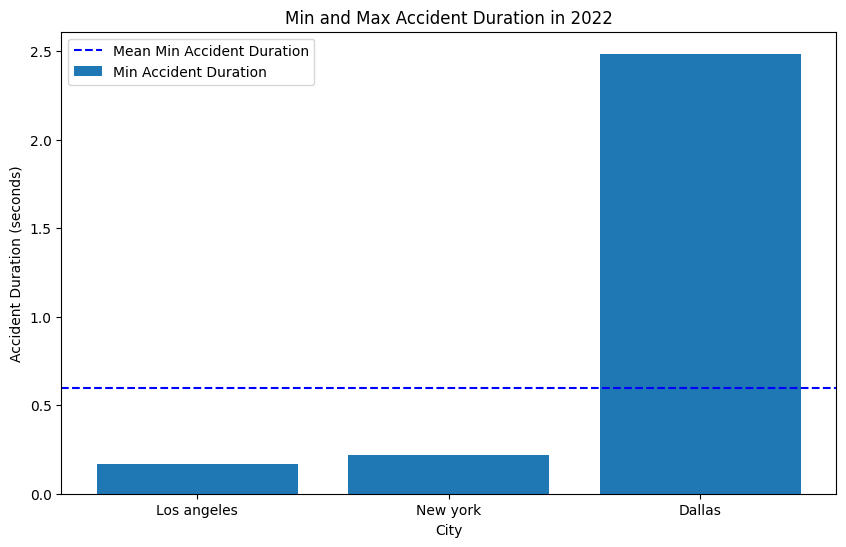

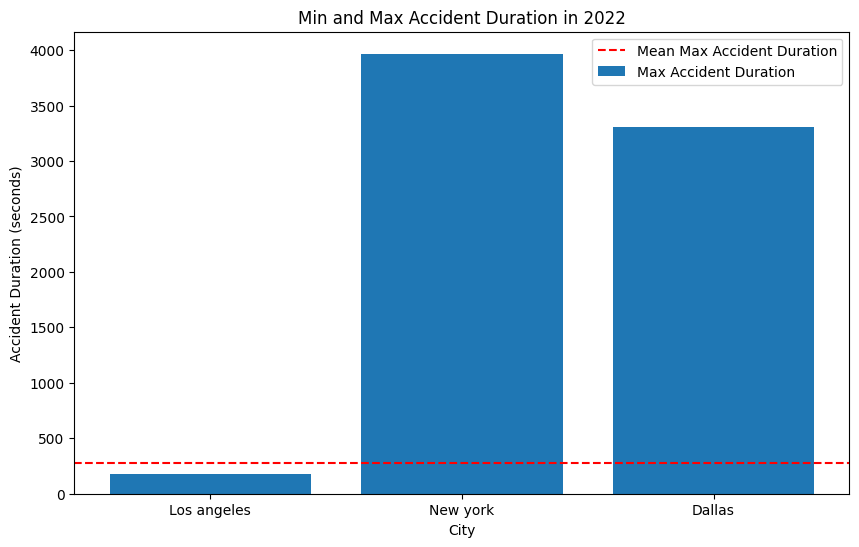

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(filtered_min_max_df["City"], filtered_min_max_df["min"]/3600, label="Min Accident Duration")
plt.axhline(min_mean/3600, color='blue', linestyle='--', label='Mean Min Accident Duration')
plt.xlabel("City")
plt.ylabel("Accident Duration (seconds)")
plt.title("Min and Max Accident Duration in 2022")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(filtered_min_max_df["City"], filtered_min_max_df["max"]/3600, label="Max Accident Duration")
plt.axhline(max_mean/3600, color='red', linestyle='--', label='Mean Max Accident Duration')
plt.xlabel("City")
plt.ylabel("Accident Duration (seconds)")
plt.title("Min and Max Accident Duration in 2022")
plt.legend()
plt.show()


3. Please filter the data for the years 2019 to 2023 and divide it into two bins based on the `Year` value. Then, calculate the duration ranges for each bin, grouped by `County` and `City`. Classify accidents by congestion level:

    - Accidents affecting a road length greater than the median of `Distance(mi)` across the dataset are considered **severe**.
    - Those below the median are categorized as **not severe**.

    The resulting dataframe should have `County` and `City` as row indices, with year bins and severity (severe/not severe) as hierarchical columns. The values in the dataframe should represent the range of distances, with severe accidents placed under the "Severe" column and non-severe accidents under the "Not Severe" column. Each cell should display the range of distances for a specific city, county, and year interval. For this exercise, you have to use `groupby()` and __cannot__ rely on `pivot_table()`.
    
    What is the combination of county-city-year-range with the widest range of accidents duration?
    
    
    The following table shows how the dataframe should look:

<br>
YB = Year bin range
<br>
DB = Range of minimum and maximum durations
<br>

<table>
    <tr>
        <th rowspan="2">County</th>
        <th rowspan="2">City</th>
        <th colspan="2">Not Severe</th> 
        <th colspan="2">Severe</th>
    </tr>
    <tr>
        <th>YB</th>
        <th>YB</th>
        <th>YB</th>
        <th>YB</th>
    </tr>
    <tr>
        <th>Abbeville</th>
        <th>Bradley</th>
        <td>DB</td>
        <td>DB</td>
        <td>DB</td>
        <td>DB</td>
    </tr>
    <tr>
        <td colspan="2">...</td>
        <td colspan="2">...</td>
        <td colspan="2">...</td>
    </tr>
    <tr>
        <th>Yuma</th>
        <th>Dateland</th>
        <td>DB</td>
        <td>DB</td>
        <td>DB</td>
        <td>DB</td>
    </tr>
    <tr>
        <td colspan="2">...</td>
        <td colspan="2">...</td>
        <td colspan="2">...</td>
    </tr>
</table>

In [ ]:
years_2013_2023 = cleaned_us_accidents[cleaned_us_accidents['Year'].between(2019, 2023)]
years_2013_2023.reset_index(drop=True, inplace=True)


Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month'],
      dtype='object')

In [65]:
years_2013_2023['YB'] = pd.cut(years_2013_2023['Year'], bins=[2018, 2020, 2023], labels=['2019-2020', '2021-2023'])

# Calculate median distance for severity classification
median_distance = years_2013_2023['Distance(mi)'].median()
years_2013_2023['Severity'] = years_2013_2023['Distance(mi)'].apply(
    lambda x: 'Severe' if x > median_distance else 'Not Severe'
)

grouped = years_2013_2023.groupby(['County', 'City', 'YB', 'Severity'])['Distance(mi)'].agg(['min', 'max'])

grouped['DB'] = grouped['min'].astype(str) + '-' + grouped['max'].astype(str)
grouped = grouped.drop(columns=['min', 'max'])

final_df = grouped.unstack(['Severity', 'YB'])
final_df.columns = final_df.columns.droplevel(0)
final_df

/var/folders/s1/sw35yzzd0jbfjch6km2zwyqm0000gn/T/ipykernel_40217/446197560.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = years_2013_2023.groupby(['County', 'City', 'YB', 'Severity'])['Distance(mi)'].agg(['min', 'max'])


Severity                 Not Severe       Severe   Not Severe       Severe
YB                        2019-2020    2019-2020    2021-2023    2021-2023
County    City                                                            
Abbeville Aaronsburg        nan-nan      nan-nan      nan-nan      nan-nan
          Abbeville     0.021-0.225  0.281-0.456  0.008-0.263  0.265-1.962
          Abbotsford        nan-nan      nan-nan      nan-nan      nan-nan
          Abbottstown       nan-nan      nan-nan      nan-nan      nan-nan
          Aberdeen          nan-nan      nan-nan      nan-nan      nan-nan
...                             ...          ...          ...          ...
Yuma      Zortman           nan-nan      nan-nan      nan-nan      nan-nan
          Zumbro Falls      nan-nan      nan-nan      nan-nan      nan-nan
          Zumbrota          nan-nan      nan-nan      nan-nan      nan-nan
          Zuni              nan-nan      nan-nan      nan-nan      nan-nan
          Zwingle           nan-nan      nan-nan      nan-nan      nan-nan

[17339033 rows x 4 columns]

In [71]:

print(grouped.head())

                                                    DB
County    City       YB        Severity               
Abbeville Aaronsburg 2019-2020 Not Severe      nan-nan
                               Severe          nan-nan
                     2021-2023 Not Severe      nan-nan
                               Severe          nan-nan
          Abbeville  2019-2020 Not Severe  0.021-0.225


### Section 2.2 
**Data Source:** `eu_energy.csv`

Please note that:

- EU countries are the following: Austria, Belgium, Bulgaria, Croatia, Cyprus, Czechia, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, Netherlands, Poland, Portugal, Romania, Slovakia, Slovenia, Spain, Sweden
- Renewable energy sources: Hydroelectric power, solar power, wind power, biofuel
- Non-renewable energy sources: Coal, fossil fuels, gas, oil, nuclear
- Clean energy sources: Hydroelectric power, solar power, wind power, nuclear
- Non-clean energy sources: Biofuel, coal, fossil fuels, gas, oil

4. Please provide a visualization that highlights the relationship between:
    - Population size;
    - CO2 emissions per capita;
    - Renewable energy production.

    in 2017. Describe the visualization identifying groups and outliers.

5. Please compute the renewable energy production percentage (one datapoint per country, per year). Then, create a visualization to investigate how the distribution of these values evolves over the years, from 2010 to 2017.

6. Please provide visualizations that show the evolution over the years (from 1990 to 2020) of:
    - Renewable energy production per capita for each country
    - Clean energy production per capita for each country
    - Net import per capita for each country

    Are there countries that behave differently from the others?

    *Please note that the goal of the visualization is not to compare all the countries with each other but to identify which ones present different trends compared to all the others.*

## Section 3 - Graph Redesign and Analysis (15 points) 📊

**Data Source:** `market_value_decline.csv`

The 2008 financial crisis had a significant impact on banks worldwide, leading to substantial losses in market value. The following graph compares the market value of major banks in 2007 (pre-crisis) and 2009 (post-crisis), using blue to represent their value before the meltdown and green to represent their value after.

The **primary** goal of this visualization is to highlight the extent of losses suffered by each bank, while also drawing attention to J.P. Morgan’s relatively minor decline compared to its peers. The **secondary** goal is to illustrate the overall ranking of banks by market value, showing their relative sizes before and after the crisis.

Does this visualization effectively convey both the absolute losses and the percentage changes in market value? Does it allow for an easy comparison of which banks retained the most value relative to their original size?

1. Evaluate the effectiveness of the graph in communicating the market value losses and the relative sizes of the banks. What improvements can be made?
2. Propose a visualization that better captures both the absolute and relative losses per bank. Should we emphasize the percentage decline more? Should we use a different chart type?
3. Implement your proposed visualization using the *market_value_decline* dataset.

**Exercise Submission Requirements:**
1. `Written analysis` of the original graph's shortcomings: Please examine the existing graph and identify any issues that hinder its ability to clearly convey the intended quantitative message.
2. `Justifications` for the proposed improvements: For each issue you identify, please discuss potential improvements or alternative visualization techniques that might resolve these issues.
3. `Redesigned graph` that better communicates the data. Be sure to explain how your redesign enhances data interpretation and achieves the intended objectives more effectively.

![exercise3.png](exercise3.png)




## Section 4 - Geospatial Analysis (35 points) 🌍

**Data Source:** `airports.csv`, `countries.csv`, `routes.csv`, `europe.geojson`.

Please create an interactive map representation—focused on European countries—such that, when a country is selected, the map displays the flight balance (number of incoming flights - number of outgoing flights) between that country and all other European countries. The map should dynamically update based on the selected country, visually representing the extent to which each country is a net sender or receiver of flights.

**Hints**:
1. If `A` is a GeoDataFrame and `B` a DataFrame, the result of `A.merge(B,..)` is a GeoDataFrame, whereas the result of `B.merge(A,..)` is a DataFrame. The function `to_json()` on a DataFrame with a geometry column does **not** work.
2. When updating the map, to access the color mapper you can use the following method: `color_mapper = p.select_one(LinearColorMapper)`, where `p` is the figure.
3. You can discard Guernsey and Gibraltar that are not present in the geojson.

## Datasets Description

You can find the dataset in the `datasets` folder. The descriptions of the datasets are provided below.

### Used Cars

The content of the dataset is in German, but it should not impose critical issues in understanding the data. Each entry contains the following information.

| **Field**                    | **Description** |
|------------------------------|---------------|
| **dateCrawled**               | When this ad was first crawled, all field values are taken from this date. |
| **name**                      | The name of the car. |
| **seller**                    | Seller type (private or dealer). |
| **offerTypeprice**            | The price in euros for the car on the ad. |
| **abtest**                    | Type of test. |
| **vehicleType**               | Type of vehicle. |
| **yearOfRegistration**        | The year the car was first registered. |
| **gearboxpowerPS**            | Power of the car in PS (horsepower). |
| **modelkilometer**            | How many kilometers the car has driven. |
| **monthOfRegistration**       | The month the car was first registered. |
| **fuelType**                  | Vehicle fuel type. |
| **brand**                     | Vehicle brand. |
| **notRepairedDamage**         | If the car has any damage that has not been repaired yet. |
| **dateCreated**               | The date the ad was created on eBay. |
| **nrOfPictures**              | Number of pictures in the ad. |
| **postalCodelastSeenOnline**  | When the crawler last saw this ad online. |


### US Accidents

| **Field**              | **Description** |
|------------------------|---------------|
| **ID** | Unique identifier of the accident record. |
| **Severity** | Severity of the accident (1-4), where 1 indicates the least impact on traffic and 4 indicates significant impact. |
| **Start_Time** | Start time of the accident in local time zone. |
| **End_Time** | End time of the accident in local time zone (when the impact on traffic flow was dismissed). |
| **Start_Lat** | Latitude in GPS coordinate of the start point. |
| **Start_Lng** | Longitude in GPS coordinate of the start point. |
| **End_Lat** | Latitude in GPS coordinate of the end point. |
| **End_Lng** | Longitude in GPS coordinate of the end point. |
| **Distance(mi)** | Length of the road extent affected by the accident. |
| **Description** | Natural language description of the accident. |
| **Number** | Street number in address field. |
| **Street** | Street name in address field. |
| **Side** | Relative side of the street (Right/Left) in address field. |
| **City** | City in address field. |
| **County** | County in address field. |
| **State** | State in address field. |
| **Zipcode** | Zipcode in address field. |
| **Country** | Country in address field. |
| **Timezone** | Timezone based on the location of the accident (eastern, central, etc.). |
| **Airport_Code** | Closest airport-based weather station to the accident location. |
| **Weather_Timestamp** | Timestamp of weather observation record (in local time). |
| **Temperature(F)** | Temperature (in Fahrenheit). |
| **Wind_Chill(F)** | Wind chill (in Fahrenheit). |
| **Humidity(%)** | Humidity (in percentage). |
| **Pressure(in)** | Air pressure (in inches). |
| **Visibility(mi)** | Visibility (in miles). |
| **Wind_Direction** | Wind direction. |
| **Wind_Speed(mph)** | Wind speed (in miles per hour). |
| **Precipitation(in)** | Precipitation amount in inches, if any. |
| **Weather_Condition** | Weather condition (rain, snow, thunderstorm, fog, etc.). |
| **Amenity** | POI annotation indicating presence of an amenity nearby. |
| **Bump** | POI annotation indicating presence of a speed bump or hump nearby. |
| **Crossing** | POI annotation indicating presence of a crossing nearby. |
| **Give_Way** | POI annotation indicating presence of a give-way sign nearby. |
| **Junction** | POI annotation indicating presence of a junction nearby. |
| **No_Exit** | POI annotation indicating presence of a no-exit nearby. |
| **Railway** | POI annotation indicating presence of a railway nearby. |
| **Roundabout** | POI annotation indicating presence of a roundabout nearby. |
| **Station** | POI annotation indicating presence of a station nearby. |
| **Stop** | POI annotation indicating presence of a stop sign nearby. |
| **Traffic_Calming** | POI annotation indicating presence of traffic calming measures nearby. |
| **Traffic_Signal** | POI annotation indicating presence of a traffic signal nearby. |
| **Turning_Loop** | POI annotation indicating presence of a turning loop nearby. |
| **Sunrise_Sunset** | Period of day (day or night) based on sunrise/sunset. |
| **Civil_Twilight** | Period of day (day or night) based on civil twilight. |
| **Nautical_Twilight** | Period of day (day or night) based on nautical twilight. |
| **Astronomical_Twilight** | Period of day (day or night) based on astronomical twilight. |


### Energy Data

| **Field**                | **Description** |
|---------------------------|-----------------|
| **country**               | Geographic location. |
| **year**                  | Year of observation. |
| **gdp**                   | (Gross Domestic Product) This data is adjusted for inflation and differences in the cost of living between countries. |
| **population**            | Population by country, based on data and estimates from different sources. |
| **greenhouse_gas_emissions** | Emissions from electricity generation. Measured in megatonnes of CO₂ equivalents. |
| **net_elec_imports**      | Net electricity imports. Electricity imports minus exports, measured in TWh. |
| **biofuel_consumption**   | Primary energy consumption from biofuels. Measured in terawatt-hours. |
| **coal_consumption**      | Primary energy consumption from coal. Measured in terawatt-hours. |
| **fossil_fuel_consumption** | Primary energy consumption from fossil fuels. Measured in terawatt-hours. |
| **gas_consumption**       | Primary energy consumption from gas. Measured in terawatt-hours. |
| **oil_consumption**       | Primary energy consumption from oil. Measured in terawatt-hours. |
| **nuclear_consumption**   | Primary energy consumption from nuclear power. Measured in terawatt-hours, using the substitution method. |
| **hydro_consumption**     | Primary energy consumption from hydropower. Measured in terawatt-hours, using the substitution method. |
| **solar_consumption**     | Primary energy consumption from solar power. Measured in terawatt-hours, using the substitution method. |
| **wind_consumption**      | Primary energy consumption from wind power. Measured in terawatt-hours, using the substitution method. |
| **biofuel_electricity**   | Electricity generation from bioenergy. Measured in terawatt-hours. |
| **coal_electricity**      | Electricity generation from coal. Measured in terawatt-hours. |
| **fossil_electricity**    | Electricity generation from fossil fuels. Measured in terawatt-hours. |
| **gas_electricity**       | Electricity generation from gas. Measured in terawatt-hours. |
| **oil_electricity**       | Electricity generation from oil. Measured in terawatt-hours. |
| **nuclear_electricity**   | Electricity generation from nuclear. Measured in terawatt-hours. |
| **hydro_electricity**     | Electricity generation from hydropower. Measured in terawatt-hours. |
| **solar_electricity**     | Electricity generation from solar power. Measured in terawatt-hours. |
| **wind_electricity**      | Electricity generation from wind power. Measured in terawatt-hours. |



### Airports

As of January 2017, the OpenFlights Airports Database contains over 10,000 airports, train stations and ferry terminals spanning the globe, as shown in the map above. Each entry contains the following information:

| **Field**                 | **Description** |
|---------------------------|---------------|
| **Airport ID** | Unique OpenFlights identifier for this airport. |
| **Name** | Name of the airport. May or may not contain the city name. |
| **City** | Main city served by the airport. May be spelled differently from the name. |
| **Country** | Country or territory where the airport is located. Can be cross-referenced with ISO 3166-1 codes. |
| **IATA** | 3-letter IATA code. Null if not assigned/unknown. |
| **ICAO** | 4-letter ICAO code. Null if not assigned/unknown. |
| **Latitude** | Decimal degrees, usually to six significant digits. Negative is South, positive is North. |
| **Longitude** | Decimal degrees, usually to six significant digits. Negative is West, positive is East. |
| **Altitude** | Altitude in feet. |
| **Timezone** | Hours offset from UTC. Fractional hours are expressed as decimals (e.g., India is 5.5). |
| **DST** | Daylight savings time classification: E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None), or U (Unknown). |
| **Tz database time zone** | Timezone in "tz" (Olson) format (e.g., "America/Los_Angeles"). |
| **Type** | Type of the airport. Value is "airport" for air terminals. |
| **Source** | Source of the data. "OurAirports" for data sourced from OurAirports. |


### Routes

As of June 2014, the OpenFlights/Airline Route Mapper Route Database contains 67663 routes between 3321 airports on 548 airlines spanning the globe. \
Each entry contains the following information.

| **Field**                | **Description** |
|--------------------------|---------------|
| **Airline** | 2-letter (IATA) or 3-letter (ICAO) code of the airline. |
| **Airline ID** | Unique OpenFlights identifier for the airline. |
| **Source airport** | 3-letter (IATA) or 4-letter (ICAO) code of the source airport. |
| **Source airport ID** | Unique OpenFlights identifier for the source airport. |
| **Destination airport** | 3-letter (IATA) or 4-letter (ICAO) code of the destination airport. |
| **Destination airport ID** | Unique OpenFlights identifier for the destination airport. |
| **Codeshare** | "Y" if the flight is a codeshare (operated by another carrier), empty otherwise. |
| **Stops** | Number of stops on the flight ("0" for direct). |
| **Equipment** | 3-letter codes for plane type(s) generally used on this flight, separated by spaces. |


The data is UTF-8 encoded. The special value `\N` is used for "NULL" to indicate that no value is available, and is understood automatically by MySQL if imported


<aside>
💡 Notes:

- Routes are directional: if an airline operates services from A to B and from B to A, both A-B and B-A are listed separately.
- Routes where one carrier operates both its own and codeshare flights are listed only once.
</aside>


### Countries

This dataset contains the information related to European countries. 